```
Topic:        Challenge Set 5
Subject:      Linear Regression and Train/Test Split challenges
Date:         10/09/2017
Name:         Jeff Kao
Worked with:  Jeff Kao... :-(
```

# Week 3 Challenge: Luther (Linear Regression and Train/Test Split challenges)

### Challenge 0

We are using my scraped 2000_movies.csv data set from Week 2.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
movies_df = pd.read_csv('2000_movies.csv', index_col=0, parse_dates=['release_date'])

### Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [3]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 0 to 373
Data columns (total 7 columns):
title                   374 non-null object
budget                  156 non-null float64
domestic_total_gross    374 non-null int64
director                246 non-null object
rating                  374 non-null object
runtime                 342 non-null float64
release_date            374 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 23.4+ KB


In [4]:
y_c1 = movies_df['domestic_total_gross']
X_c1 = np.ones(y_c1.shape, dtype=np.int)

In [5]:
# fit the model
lr_model_c1 = LinearRegression()
lr_model_c1.fit(X_c1.reshape(-1, 1),y_c1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
lr_model_c1.coef_, lr_model_c1.intercept_

(array([ 0.]), 20691840.505347595)

How can you interpret the results of this model?

* The coefficient of this model is the extent to which Domestic Total Gross (DTG) varies in accordance with variation in the explanatory variable, in this case, the number "1". The intercept is the mean of the DTG.

What does it predict? 
* It merely predicts a value of the mean of the target variable (DTG) for the actual target variable.

Make a plot of predictions against actual outcome. 

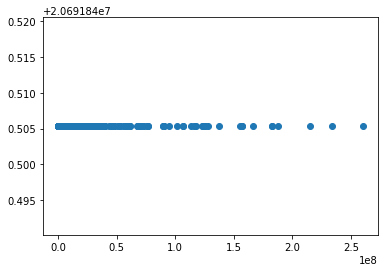

In [7]:
y_pred = lr_model_c1.coef_*X_c1 + lr_model_c1.intercept_
y_values = y_c1
plt.scatter(y_values, y_pred)
plt.show()

Make a histogram of residuals. How are the residuals distributed?

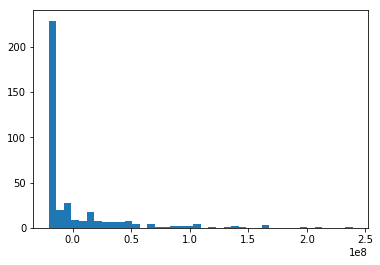

In [8]:
residuals = y_values - y_pred
plt.hist(residuals, bins=40);

A wide majority of the residuals are far below the mean, indicating that most of the movies are smaller budget

### Challenge 2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [9]:
# make sure first we fill in missing runtimes with mean runtime
movies_df[['runtime']] = movies_df[['runtime']].fillna(value=movies_df['runtime'].mean())

# build our X and y
y_c2 = movies_df['domestic_total_gross']
X_c2_a = np.ones(y_c1.shape, dtype=np.int)
X_c2_b = movies_df['runtime'].values
X_c2 = np.vstack((X_c2_a, X_c2_b)).transpose()

In [10]:
# fit the model
lr_model_c2 = LinearRegression()
lr_model_c2.fit(X_c2,y_c2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
lr_model_c2.coef_, lr_model_c2.intercept_

(array([      0.        ,  306500.16863667]), -11471857.015709415)

How can you interpret the results of this model?

* The coefficients of this model are the extents to which Domestic Total Gross (DTG) varies in accordance with variation in the explanatory variables, in this case, in the number "1" and in the runtime. The intercept is value assuming both values are zero.

What does it predict? 
* It predicts the value of the target variable (DTG) given the explanatory variable runtime. Since the coefficient of the number "1" is zero, it is essentially non-explanatory.

Make a plot of predictions against actual outcome. 

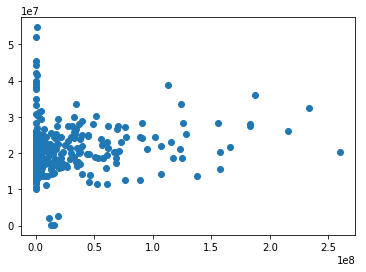

In [12]:
y_pred = lr_model_c2.predict(X_c2)
y_values = y_c2
plt.scatter(y_values, y_pred)
plt.show()

Make a histogram of residuals. How are the residuals distributed?

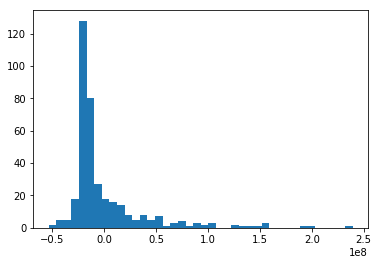

In [13]:
residuals = y_values - y_pred
plt.hist(residuals, bins=40);

The residuals are still distributed below zero, and the distribution skews right, which indicates that the resulting predictions tend to overpredict the actual values. This is because there are a few very high DTG residuals that bias the square error upwards.

### Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [14]:
# build our X and y
y_c3 = movies_df['domestic_total_gross']
X_c3_c = pd.get_dummies(movies_df['rating'])
X_c3 = np.hstack((X_c2,X_c3_c))

In [15]:
# fit the model
lr_model_c3 = LinearRegression()
lr_model_c3.fit(X_c3,y_c3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
lr_model_c3.coef_, lr_model_c3.intercept_

(array([        0.        ,    352550.87053491,  14057548.06097824,
         10274803.70322501,  16697951.8113532 , -13621420.04087997,
        -27408883.53467647]), -9357231.0378017202)

How can you interpret the results of this model?

* The coefficients of this model are the extents to which Domestic Total Gross (DTG) varies in accordance with variation in the explanatory variables, in this case, in the number "1", the runtime, and the five rating categories: G, PG, PG-13, R, Unrated. The intercept is the value assuming all values are zero. In this case that is an impossible result since the movie must be one of the five categories.

What does it predict? 
* It predicts the value of the target variable (DTG) given the 6 explanatory variables. Since the coefficient of the number "1" is zero, it is essentially non-explanatory.

Make a plot of predictions against actual outcome. 

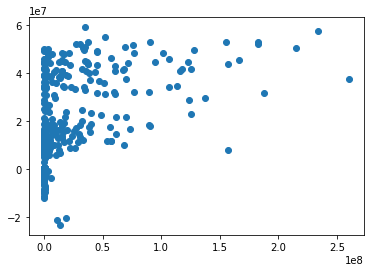

In [17]:
y_pred = lr_model_c3.predict(X_c3)
y_values = y_c3
plt.scatter(y_values, y_pred)
plt.show()

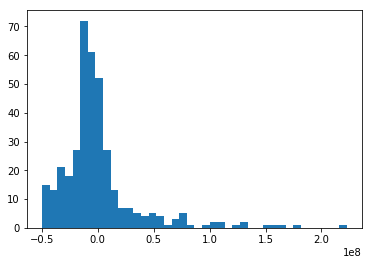

In [18]:
residuals = y_values - y_pred
plt.hist(residuals, bins=40);

The residuals are still distributed below zero, and the distribution skews right, which indicates that the resulting predictions tend to overpredict the actual values. This effect however is less pronounced than the previous plot, indicating that we have been able to explain some of the bias in error using movie ratings.  There are, however, still a number of very high DTG residuals that bias the square error upwards.

### Challenge 4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

In [19]:
#fill in budget = 0
movies_df[['budget']] = movies_df[['budget']].fillna(0)

# build our X and y
y_c4 = movies_df['domestic_total_gross']
X_c4_d = movies_df[['budget']]
X_c4 = np.hstack((X_c3,X_c4_d))

In [20]:
# fit the model
lr_model_c4 = LinearRegression()
lr_model_c4.fit(X_c4,y_c4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
lr_model_c4.coef_, lr_model_c4.intercept_

(array([  0.00000000e+00,   1.16495851e+05,   7.25821132e+06,
          1.95911969e+06,   1.89406917e+06,  -4.33575715e+06,
         -6.77564303e+06,   9.38165837e-01]), -4748220.5738708079)

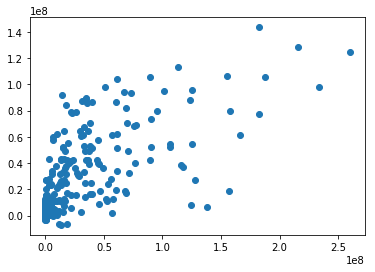

In [22]:
y_pred = lr_model_c4.predict(X_c4)
y_values = y_c4
plt.scatter(y_values, y_pred)
plt.show()

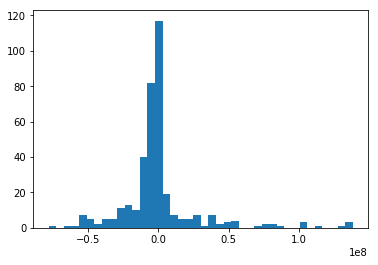

In [23]:
residuals = y_values - y_pred
plt.hist(residuals, bins=40);

### Challenge 5

Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [24]:
X_c5_train, X_c5_test, y_c5_train, y_c5_test = train_test_split(X_c4, y_c4, test_size=0.25,random_state=42)

In [25]:
# fit the model
lr_model_c5 = LinearRegression()
lr_model_c5.fit(X_c5_train,y_c5_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
lr_model_c5.coef_, lr_model_c5.intercept_

(array([  0.00000000e+00,   1.46547213e+05,   1.00860689e+07,
         -2.80000079e+06,   4.82382208e+06,  -4.25068320e+06,
         -7.85920702e+06,   8.63353912e-01]), -6709703.5055561811)

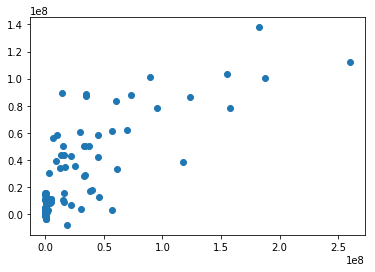

In [27]:
y_pred = lr_model_c5.predict(X_c5_test)
y_values = y_c5_test
plt.scatter(y_values, y_pred)
plt.show()

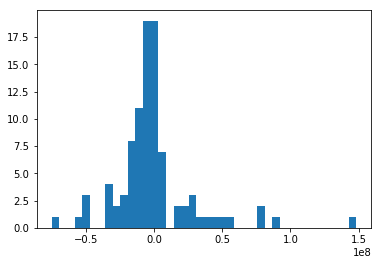

In [28]:
residuals = y_values - y_pred
plt.hist(residuals, bins=40);